# YOLO-World zero shot model for object detection
This model is pretrained as a very large model that can identify many objects and classes without explicit training by the user. In this notebook we look at the efficacy of the model in identifying different types of bees without explicit training.


0: 480x640 1 Allodapula, 8 Lasioglossums, 1 Xylocopa, 408.2ms
Speed: 5.1ms preprocess, 408.2ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)


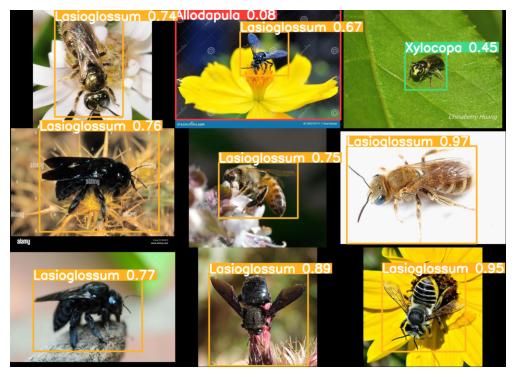

In [1]:
from ultralytics import YOLO
import cv2
from IPython.display import Image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

model_path = "models/yolov8x-worldv2.pt"
frame_path = "Dataset/Dataset_tools/mosaic_creator/mosaic_1.jpg"


def infer_and_plot(model_path, frame, conf_threshold=0.05):
    model = YOLO(model_path)
    model.set_classes(
        [
            "Allodapula",
            "Apis-mellifera-scutellata",
            "Braunsapis",
            "Lasioglossum",
            "Meliponula",
            "Seladonia",
            "Thyreus",
            "Xylocopa",
        ]
    )
    yolo_detections = model.predict(
    frame,
    iou=0.3,
    agnostic_nms=True,
    conf=0.05,
    )
    result_image = yolo_detections[0].plot()
    return result_image

result_image = infer_and_plot(model_path, cv2.imread(frame_path), conf_threshold=0.05)
result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
result_image_pil = Image.fromarray(result_image_rgb)
plt.imshow(result_image_pil)
plt.savefig("inf_yolo_world_mosaic.png", dpi=1000)
plt.axis('off')
plt.show()

## Results
Here we can see that the bees are all identified as "Lasioglossum" (except for one which is "Xyocopa") which is not correct. Therefore, this zero-shot model cannot work for identifying different types of bees.